In [1]:
!pip uninstall torch -y
!pip uninstall torchvision -y

Found existing installation: torch 2.2.2
Uninstalling torch-2.2.2:
  Successfully uninstalled torch-2.2.2
Found existing installation: torchvision 0.17.2
Uninstalling torchvision-0.17.2:
  Successfully uninstalled torchvision-0.17.2


In [2]:
!pip install torch==2.2.2
!pip install torchvision==0.17.2
!pip install torchaudio==2.2.2

  Using cached torch-2.2.2-cp312-cp312-manylinux1_x86_64.whl.metadata (25 kB)
Using cached torch-2.2.2-cp312-cp312-manylinux1_x86_64.whl (755.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.1 requires torch==2.3.1, but you have torch 2.2.2 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
  Using cached torchvision-0.17.2-cp312-cp312-manylinux1_x86_64.whl.metadata (6.6 kB)
Using cached torchvision-0.17.2-cp312-cp312-manylinux1_x86_64.whl (6.9 MB)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.3.1
    Uninstalli

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# 1. Definir transformaciones (normalización + ToTensor)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),   # media (RGB)
                         (0.5, 0.5, 0.5))   # std (RGB)
])

In [3]:
# 2. Descargar dataset CIFAR-10 (train y test)
trainset = torchvision.datasets.CIFAR10(
    root='../data',          # carpeta donde se guardará
    train=True,             # conjunto de entrenamiento
    download=True,          # lo descarga si no está ya
    transform=transform     # aplica transformaciones
)
testset = torchvision.datasets.CIFAR10(
    root='../data',
    train=False,
    download=True,
    transform=transform
)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
# 3. DataLoaders (para batch training)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=64,          # número de imágenes por batch
    shuffle=True,           # mezcla los datos
    num_workers=2           # procesos en paralelo
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

In [5]:
# 4. Clases disponibles en CIFAR-10
classes = trainset.classes
print("Clases:", classes)

Clases: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


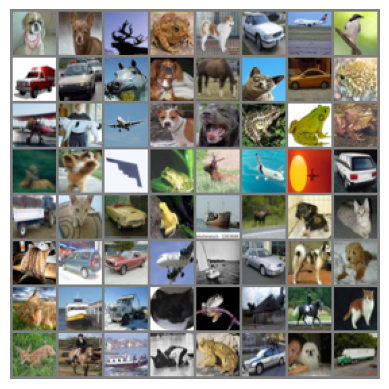

Etiquetas: dog dog deer frog dog automobile airplane bird truck automobile horse dog horse cat automobile frog airplane cat airplane dog dog frog frog frog deer dog airplane frog deer airplane airplane automobile truck cat automobile frog ship deer dog cat cat automobile automobile airplane ship automobile dog dog cat ship truck cat frog airplane horse cat deer horse ship cat frog automobile dog truck


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # cambiar de CxHxW a HxWxC
    plt.axis('off')
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

# Mostrar imágenes
imshow(torchvision.utils.make_grid(images))

# Mostrar etiquetas
print('Etiquetas:', ' '.join(f'{classes[labels[j]]}' for j in range(len(labels))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.96862745..0.75686276].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8666667..0.41960788].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.70980394..0.8745098].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.92156863].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9764706..0.8509804].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.41176474].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9921568

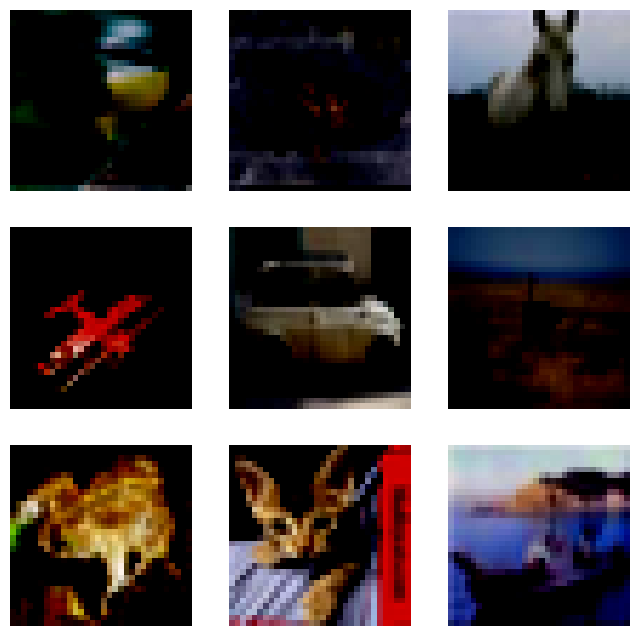

In [13]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()